In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from RegressionModels import ClusterElasticNet
from sklearn.linear_model import ElasticNet

## Cluster Elastic Net

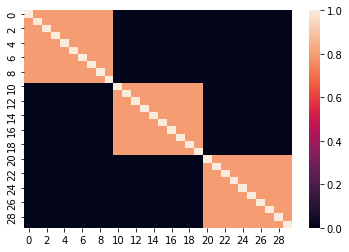

In [16]:
### sanity check
n = 100
p = 30

r = 0.8
block = r * np.ones((p//3, p//3))
np.fill_diagonal(block, 1)

zero_block = np.zeros((p//3, p//3))

cov_mat = np.block([[block, zero_block, zero_block], 
                    [zero_block, block, zero_block],
                    [zero_block, zero_block, block]])

sns.heatmap(cov_mat)

X_tmp = np.random.multivariate_normal(mean=np.zeros(p), cov=cov_mat, size=n)
beta_tmp = np.hstack([np.ones(p//3), np.zeros(p//3), -np.ones(p//3)])
y_tmp =  X_tmp @ beta_tmp +  0.1 * np.random.randn(n)

In [17]:
CEN = ClusterElasticNet(3, 1e-3, 1e-3, tol=1e-3, max_iter=100, weight_update='random')
CEN.fit(X_tmp, y_tmp, verbose=True)
print(np.round(CEN.coef_, 4), np.round(CEN.intercept_, 4))

Iteration 0, beta_change: 0.0031
Iteration 1, beta_change: 0.0025
Iteration 2, beta_change: 0.0004
[ 0.9527  1.0334  0.9976  1.0242  0.9367  0.9976  1.0153  1.0122  0.9699
  1.0455 -0.0597  0.     -0.0145  0.0175 -0.      0.0043 -0.0174  0.0407
  0.0205 -0.0035 -1.0153 -0.9925 -1.0006 -0.9921 -0.9692 -0.9953 -1.0232
 -1.001  -0.9977 -1.012 ] [0.0031]


In [18]:
net = ElasticNet(alpha=2 * 1e-3, l1_ratio=0.5)
net.fit(X_tmp, y_tmp)
print(np.round(net.coef_, 4), np.round(net.intercept_, 4))

[ 0.9532  1.0335  0.9973  1.024   0.9385  0.9966  1.0111  1.0119  0.9694
  1.045  -0.0588  0.     -0.0156  0.0175  0.      0.0044 -0.019   0.0418
  0.0206 -0.0031 -1.0164 -0.9937 -1.0004 -0.99   -0.9684 -0.9948 -1.0224
 -0.9996 -0.9973 -1.0118] 0.0027


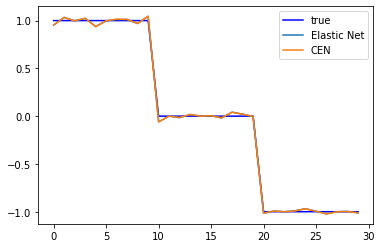

In [19]:
plt.plot(beta_tmp, label="true", c='b')
plt.plot(net.coef_, label="Elastic Net")
plt.plot(CEN.coef_, label="CEN")
plt.legend()
plt.show()